****Hand Written Digit Prediction - Classification Analysis****

**The digit dataset consist of 8x8 pixel images of digit. The image attribute of the dataset store 8x8 array of grayscale value for each iamge. We will use these use to visualize the frist 4 image . The target attribute of the dataset stores the digit each image represents*

**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as pd

In [3]:
import matplotlib.pyplot as plt

**Import Data**

In [5]:
from sklearn.datasets import load_digits

In [7]:
df=load_digits()

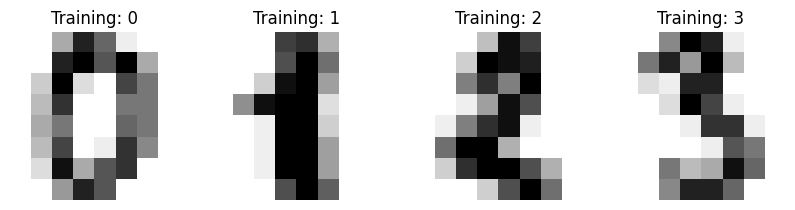

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r , interpolation="nearest")
    ax.set_title("Training: %i" % label)

**Data Processing**

Flatten image

In [13]:
df.images.shape

(1797, 8, 8)

In [14]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
df.images [0].shape

(8, 8)

In [17]:
len(df.images)

1797

In [20]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [21]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
data[0].shape

(64,)

In [23]:
data.shape

(1797, 64)

**Scalling Image Data**

In [24]:
data.min()

0.0

In [25]:
data.max()

16.0

In [26]:
data = data/16

In [27]:
data.min()

0.0

In [28]:
data.max()

1.0

In [29]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf = RandomForestClassifier()

In [37]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [38]:
y_pred =rf.predict(x_test)

In [39]:
y_pred

array([6, 1, 2, 1, 4, 5, 3, 9, 7, 4, 3, 1, 6, 4, 8, 9, 0, 4, 1, 9, 1, 0,
       0, 6, 7, 8, 6, 5, 7, 1, 4, 3, 5, 0, 2, 9, 0, 0, 4, 2, 5, 3, 1, 6,
       0, 1, 9, 1, 8, 6, 1, 5, 3, 3, 9, 4, 9, 9, 2, 3, 5, 2, 8, 0, 9, 3,
       5, 6, 8, 3, 7, 7, 4, 7, 1, 8, 6, 1, 5, 6, 5, 9, 7, 9, 5, 2, 9, 4,
       0, 9, 2, 8, 7, 8, 9, 1, 5, 7, 4, 6, 5, 7, 1, 9, 2, 0, 3, 7, 9, 5,
       2, 3, 0, 2, 6, 2, 0, 8, 2, 3, 2, 6, 3, 4, 3, 3, 2, 2, 5, 5, 8, 8,
       2, 4, 8, 6, 0, 0, 6, 3, 7, 2, 7, 1, 4, 9, 5, 1, 7, 8, 0, 3, 7, 7,
       1, 6, 0, 8, 7, 0, 7, 2, 7, 9, 7, 4, 0, 1, 0, 2, 5, 4, 3, 7, 3, 1,
       3, 0, 0, 4, 0, 5, 4, 7, 0, 5, 2, 3, 3, 3, 1, 9, 8, 6, 3, 6, 3, 7,
       1, 6, 6, 6, 3, 1, 4, 1, 6, 9, 2, 6, 5, 4, 4, 2, 4, 1, 3, 7, 3, 2,
       2, 1, 7, 8, 4, 6, 9, 6, 6, 0, 7, 4, 6, 1, 3, 3, 6, 1, 4, 2, 4, 5,
       0, 9, 1, 5, 7, 6, 6, 5, 1, 5, 1, 2, 2, 8, 0, 1, 8, 1, 4, 1, 3, 1,
       0, 0, 8, 4, 8, 7, 5, 7, 4, 7, 1, 2, 7, 5, 5, 7, 3, 6, 7, 5, 1, 2,
       3, 2, 4, 6, 2, 2, 6, 5, 2, 2, 7, 7, 6, 6, 5,

In [40]:
from sklearn.metrics import confusion_matrix,classification_report

In [41]:
confusion_matrix(y_test,y_pred)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 48,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 42,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 58,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 67,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 42,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  2, 49]])

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.93      1.00      0.97        56
           2       1.00      0.98      0.99        55
           3       1.00      1.00      1.00        58
           4       1.00      0.94      0.97        51
           5       0.95      0.98      0.97        43
           6       0.98      0.97      0.97        60
           7       0.97      0.99      0.98        68
           8       0.93      0.91      0.92        46
           9       0.94      0.92      0.93        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

